In [1]:
#Importing packages needed
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

In [2]:
#creating the list of urls
url1=[]

pages= np.arange(1,10000,249)
for i in pages:
    url1.append("https://www.imdb.com/search/title/?title_type=feature,tv_series&count=249&start=" + str(i)+"&ref_=adv_nxt") 

#creating web scraping function
class IMDB(object):
	"""docstring for IMDB"""
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		movieMetascore1 = []
		movieMetascore2 = []
		movieMetascore3 = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
#			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable" ).text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

			movieNumbers2 = movie.find_all("span", class_="metascore unfavorable")

			if len(movieNumbers2) == 1:
				movieMetascore1.append(movieNumbers2[0].text)
			else:
				movieMetascore1.append(np.nan)

			movieNumbers3 = movie.find_all("span", class_="metascore favorable")

			if len(movieNumbers3) == 1:
				movieMetascore2.append(movieNumbers3[0].text)
			else:
				movieMetascore2.append(np.nan)
                
                
			movieNumbers4 = movie.find_all("span", class_="metascore mixed")

			if len(movieNumbers4) == 1:
				movieMetascore3.append(movieNumbers4[0].text)
			else:
				movieMetascore3.append(np.nan)


		movieData = [movieTitle, movieDate, movieRunTime,  movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross, movieMetascore1, movieMetascore2, movieMetascore3]
		return movieData
    
#Applying IMDB function on lists of urls and storing data
data = []
for i in range(40):
    if __name__ == '__main__':
        site1=IMDB(url1[i])
        print("Subject: ", site1.articleTitle())
        data.append(site1.movieData())
#	for i in range(len(data)):
#		print(data[i][:])

Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
Subject:  

In [3]:
#Appending data from 40 urls
for i in range(len(data)):
    data[i]=pd.DataFrame(data[i]).transpose()
    
df=data[0].append([data[1],data[2],data[3],data[4],data[5],
data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18],data[19],data[20],
data[21],data[22],data[23],data[24],data[25],data[26],data[27],data[28],data[29],
data[30],data[31],data[32],data[33],data[34],data[35],data[36],data[37],data[38],data[39]])

In [4]:
df_new = df.rename(columns={1: 'year'})
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12
0,Money Heist,2017–,70,8.5,NaN,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN,NaN,NaN
1,Ozark,2017–,60,8.4,NaN,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN,NaN,NaN
2,Onward,I 2020,102,7.5,NaN,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,NaN,61,NaN
3,Westworld,2016–,62,8.7,NaN,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN,NaN,NaN
4,The Walking Dead,2010–,44,8.2,NaN,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN,NaN,NaN


In [5]:
#Creating a column for metascore 
df_new['meta']=np.nan

In [6]:
#Assigning value to metascore column
for i in range(len(df_new)):
    if (pd.notnull(df_new.iloc[i,10])):
        df_new.iloc[i,13]=df_new.iloc[i,10]
    elif (pd.notnull(df_new.iloc[i,11])):
        df_new.iloc[i,13]=df_new.iloc[i,11]
    else: 
        df_new.iloc[i,13]=df_new.iloc[i,12]


In [7]:
df_new.head()

,0,year,2,3,4,5,6,7,8,9,10,11,12,meta
0,Money Heist,2017–,70,8.5,NaN,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN,NaN,NaN,NaN
1,Ozark,2017–,60,8.4,NaN,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN,NaN,NaN,NaN
2,Onward,I 2020,102,7.5,NaN,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,NaN,61,NaN,61
3,Westworld,2016–,62,8.7,NaN,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN,NaN,NaN,NaN
4,The Walking Dead,2010–,44,8.2,NaN,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN,NaN,NaN,NaN


In [8]:
#Dropping metascore columns 
movies_df=df_new.drop(columns=[4,10,11,12],axis=1)

In [9]:
#Renaming columns
movies_df.columns = ['title','year','duration','rating','description','director','actors','votes','budget','metascore']

In [10]:
movies_df.head()

,title,year,duration,rating,description,director,actors,votes,budget,metascore
0,Money Heist,2017–,70,8.5,An unusual group of robbers attempt to carry o...,NaN,"[Stars:Úrsula Corberó, Álvaro Morte, Itziar It...","219,963",NaN,NaN
1,Ozark,2017–,60,8.4,A financial adviser drags his family from Chic...,NaN,"[Stars:Jason Bateman, Laura Linney, Sofia Hubl...","139,105",NaN,NaN
2,Onward,I 2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
3,Westworld,2016–,62,8.7,Set at the intersection of the near future and...,NaN,"[Stars:Evan Rachel Wood, Jeffrey Wright, Ed Ha...","389,499",NaN,NaN
4,The Walking Dead,2010–,44,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"[Stars:Andrew Lincoln, Norman Reedus, Melissa ...","822,417",NaN,NaN


In [11]:
#Subsetting the data to movies subset
movies = movies_df[~movies_df['year'].str.contains('–')]
movies.head()

,title,year,duration,rating,description,director,actors,votes,budget,metascore
2,Onward,I 2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
5,The Platform,2019,94,7.0,A vertical prison with one cell per level. Two...,Galder Gaztelu-Urrutia,"[Ivan Massagué, Zorion Eguileor, Antonia San J...","90,801",NaN,73
7,Trolls World Tour,2020,90,6.1,Poppy and Branch discover that they are but on...,"Directors:Walt Dohrn, David P. Smith","[Anna Kendrick, Justin Timberlake, Rachel Bloo...","4,125",NaN,51
9,The Gentlemen,2019,113,8.0,An American expat tries to sell off his highly...,Guy Ritchie,"[Matthew McConaughey, Charlie Hunnam, Michelle...","104,353",NaN,51
12,Extraction,2020,116,NaN,"Tyler Rake, a fearless black market mercenary,...",Sam Hargrave,"[Chris Hemsworth, Golshifteh Farahani, David H...",NaN,NaN,NaN


In [12]:
movies.iloc[5,1][-4:] 

'2019'

In [13]:
#Getting last 4 numbers of year
for i in range(len(movies)):
        movies.iloc[i,1]=movies.iloc[i,1][-4:] 
        

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
movies

,title,year,duration,rating,description,director,actors,votes,budget,metascore
2,Onward,2020,102,7.5,Two elven brothers embark on a quest to bring ...,Dan Scanlon,"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...","43,442",NaN,61
5,The Platform,2019,94,7.0,A vertical prison with one cell per level. Two...,Galder Gaztelu-Urrutia,"[Ivan Massagué, Zorion Eguileor, Antonia San J...","90,801",NaN,73
7,Trolls World Tour,2020,90,6.1,Poppy and Branch discover that they are but on...,"Directors:Walt Dohrn, David P. Smith","[Anna Kendrick, Justin Timberlake, Rachel Bloo...","4,125",NaN,51
9,The Gentlemen,2019,113,8.0,An American expat tries to sell off his highly...,Guy Ritchie,"[Matthew McConaughey, Charlie Hunnam, Michelle...","104,353",NaN,51
12,Extraction,2020,116,NaN,"Tyler Rake, a fearless black market mercenary,...",Sam Hargrave,"[Chris Hemsworth, Golshifteh Farahani, David H...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
242,The Crimson Rivers,2000,106,6.9,A murder detective must follow the footsteps o...,Mathieu Kassovitz,"[Jean Reno, Vincent Cassel, Nadia Farès, Domin...","56,162",$0.63M,49
243,The Playboy Club,2011,60,6.5,Centers on the Bunnies and patrons of the orig...,NaN,"[Stars:Randy Steinmeyer, Eddie Cibrian, David ...","4,770",NaN,NaN
245,The Whole Ten Yards,2004,98,5.5,Jimmy the Tulip's (Willis) quiet new life is s...,Howard Deutch,"[Bruce Willis, Matthew Perry, Natasha Henstrid...","52,775",$16.32M,24
247,The Pirates of Somalia,2017,116,6.8,"In 2008, rookie journalist Jay Bahadur forms a...",Bryan Buckley,"[Al Pacino, Evan Peters, Melanie Griffith, Bar...","8,178",NaN,54


In [15]:
#Importing second dataset
movies_kaggle=pd.read_csv('movies_metadata.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
movies_kaggle.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [17]:
movies_kaggle.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [18]:
movies_kaggle=movies_kaggle.drop(columns=['belongs_to_collection','budget','homepage','id','imdb_id',
                            'original_title', 'overview', 'runtime',
                            'spoken_languages', 'status', 'tagline', 'video',
                            'vote_average', 'vote_count'],axis=1);

In [19]:
movies_kaggle.head()

,adult,genres,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,title
0,FALSE,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,Toy Story
1,FALSE,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,Jumanji
2,FALSE,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,Grumpier Old Men
3,FALSE,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,Waiting to Exhale
4,FALSE,"[{'id': 35, 'name': 'Comedy'}]",en,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,Father of the Bride Part II


In [20]:
movies_kaggle=movies_kaggle.drop_duplicates(subset="title",keep=False)

In [21]:
#Getting last 4 numbers of year
for i in range(len(movies_kaggle)):
    if (pd.notnull(movies_kaggle.iloc[i,7])):
        movies_kaggle.iloc[i,7]=movies_kaggle.iloc[i,7][0:4] 

In [22]:
movies_kaggle

,adult,genres,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,title
0,FALSE,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,373554033.0,Toy Story
1,FALSE,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,262797249.0,Jumanji
2,FALSE,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,0.0,Grumpier Old Men
3,FALSE,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995,81452156.0,Waiting to Exhale
4,FALSE,"[{'id': 35, 'name': 'Comedy'}]",en,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,76578911.0,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...
45459,FALSE,"[{'id': 878, 'name': 'Science Fiction'}]",en,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995,0.0,Caged Heat 3000
45461,FALSE,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,Subdue
45462,FALSE,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011,0.0,Century of Birthing
45464,FALSE,[],en,0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917,0.0,Satan Triumphant


In [23]:
#Joining the two datasets
movies_ratings=pd.merge(movies,movies_kaggle,left_on=['title','year'],right_on=['title','release_date'])


In [24]:
len(movies_ratings)

4292

In [25]:
movies_ratings.columns

Index(['title', 'year', 'duration', 'rating', 'description', 'director',
       'actors', 'votes', 'budget', 'metascore', 'adult', 'genres',
       'original_language', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue'],
      dtype='object')

In [26]:
movies_ratings=movies_ratings.drop(columns='release_date',axis=1)

In [27]:
movies_ratings.to_csv('movies_ratings.csv')

In [28]:
#Checking for null values
movies_ratings.isnull().sum()

title                     0
year                      0
duration                  0
rating                    0
description               0
director                  2
actors                    0
votes                     0
budget                  567
metascore               571
adult                     0
genres                    0
original_language         0
popularity                0
poster_path               1
production_companies      0
production_countries      0
revenue                   0
dtype: int64

In [29]:
movies_ratings.describe()

,revenue
count,4.292000e+03
mean,8.821594e+07
std,1.652555e+08
min,0.000000e+00
25%,5.961025e+04
50%,2.657973e+07
75%,1.000368e+08
max,2.787965e+09


In [30]:
movies_ratings["duration"] = movies_ratings["duration"].astype(str).astype(float)
movies_ratings["rating"] = movies_ratings["rating"].astype(str).astype(float)
#movies_ratings["votes"] = movies_ratings["votes"].astype(str).astype(float)
#movies_ratings["budget"] = movies_ratings["budget"].astype(str)
movies_ratings["metascore"] = movies_ratings["metascore"].astype(str).astype(float)
movies_ratings["popularity"] = movies_ratings["popularity"].astype(str).astype(float)
movies_ratings["revenue"] = movies_ratings["revenue"].astype(str).astype(float)

In [31]:
movies_ratings.describe()

,duration,rating,metascore,popularity,revenue
count,4292.000000,4292.000000,3721.000000,4292.000000,4.292000e+03
mean,110.088304,6.664725,57.701156,10.524998,8.821594e+07
std,22.155798,0.966654,18.279033,13.479438,1.652555e+08
min,44.000000,1.800000,1.000000,0.003235,0.000000e+00
25%,95.750000,6.100000,45.000000,6.450957,5.961025e+04
50%,106.000000,6.700000,58.000000,8.931463,2.657973e+07
75%,120.000000,7.300000,71.000000,12.049130,1.000368e+08
max,450.000000,9.300000,100.000000,547.488298,2.787965e+09


In [32]:
for i in range(len(movies_ratings)):
    if (pd.notnull(movies_ratings.iloc[i,8])):
     movies_ratings.iloc[i,8]=movies_ratings.iloc[i,8].strip('$').strip('M')



In [33]:
movies_ratings["budget"] = movies_ratings["budget"].astype(str).astype(float)

In [34]:
type(movies_ratings.iloc[1,8])

numpy.float64

In [35]:
movies_ratings['budget']=movies_ratings['budget']*1000000

In [36]:
movies_ratings.describe()

,duration,rating,budget,metascore,popularity,revenue
count,4292.000000,4292.000000,3.725000e+03,3721.000000,4292.000000,4.292000e+03
mean,110.088304,6.664725,5.063932e+07,57.701156,10.524998,8.821594e+07
std,22.155798,0.966654,6.662534e+07,18.279033,13.479438,1.652555e+08
min,44.000000,1.800000,0.000000e+00,1.000000,0.003235,0.000000e+00
25%,95.750000,6.100000,8.550000e+06,45.000000,6.450957,5.961025e+04
50%,106.000000,6.700000,2.958000e+07,58.000000,8.931463,2.657973e+07
75%,120.000000,7.300000,6.500000e+07,71.000000,12.049130,1.000368e+08
max,450.000000,9.300000,7.605100e+08,100.000000,547.488298,2.787965e+09


In [37]:
movies_ratings["title"] = movies_ratings["title"].astype('str')
movies_ratings["year"] = movies_ratings["year"].astype('str').astype('category')
movies_ratings["director"] = movies_ratings["director"].astype('str').astype('category')
movies_ratings["adult"] = movies_ratings["adult"].astype('str').astype('category')
movies_ratings["original_language"] = movies_ratings["original_language"].astype('str').astype('category')


In [38]:
# Dropping null values
movies_ratings=movies_ratings.dropna(how='any',axis=0) 

In [39]:
len(movies_ratings)

3468

In [40]:
c = movies_ratings[['year','original_language']]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(c)
c2 = encoder.transform(c)
df = pd.DataFrame(c2, columns=encoder.get_feature_names())
df
movies_ratings2 = pd.concat([movies_ratings.drop(['year','original_language'],axis=1),df],axis=1)

In [41]:
#Correlation matrix
import seaborn as sns 

corr = movies_ratings2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We observe high positive correlation between the following variables:
- rating and duration
- metascore and rating
- budget and revenue
- revenue and popularity

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

In [43]:
movies_ratings=movies_ratings2.drop(['title','description','director','actors','votes','adult','genres','poster_path','production_companies','production_countries'], axis=1)

In [75]:
movies_ratings

,duration,rating,budget,metascore,popularity,revenue,x0_1931,x0_1934,x0_1936,x0_1937,...,x1_nl,x1_pl,x1_pt,x1_ro,x1_ru,x1_sv,x1_th,x1_tr,x1_xx,x1_zh
0,106.0,6.7,75660000.0,70.0,8.244359,137551594.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,142.0,9.3,28340000.0,80.0,51.645403,28341469.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,127.0,7.2,370780000.0,47.0,13.194168,611899420.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175.0,9.2,134970000.0,100.0,41.109264,245066411.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,148.0,8.8,292580000.0,74.0,29.108149,825532764.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,104.0,6.5,44140000.0,47.0,11.977636,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463,104.0,5.7,4990000.0,45.0,6.576130,5001655.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3465,95.0,6.4,119790000.0,59.0,14.412061,248384621.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3466,109.0,5.9,14050000.0,43.0,10.829432,28169671.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Dropping null values
movies_ratings=movies_ratings.dropna(how='any',axis=0) 

In [309]:
#Splitting the data into training and testing (80-20%)
y=movies_ratings.rating
x=movies_ratings.drop('rating',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [200]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
duration,9.443081e-03
budget,-6.762541e-11
metascore,3.450009e-02
popularity,1.669797e-03
revenue,1.275391e-12
...,...
x1_sv,3.304232e-01
x1_th,-3.620208e-01
x1_tr,6.376714e-01
x1_xx,-9.465231e-02


In [202]:
y_pred = regressor.predict(x_test)




In [203]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
93,7.4,7.581061
651,7.5,6.548097
232,8.1,7.846261
3211,6.5,6.642328
884,7.6,7.846865
1514,7.4,7.147378
1092,5.9,5.858278
2519,5.7,5.701511
2933,5.8,5.909080
31,8.0,7.570918


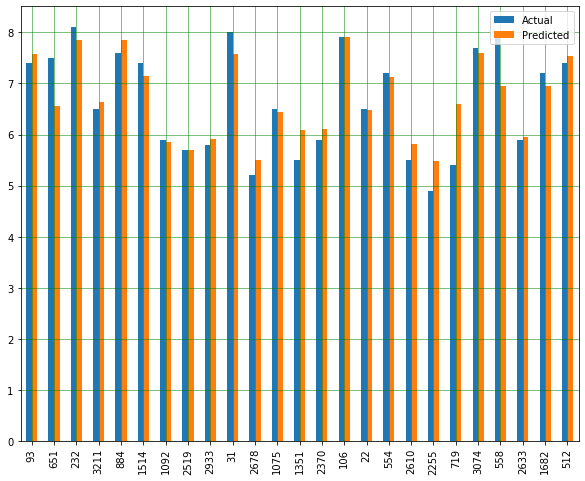

In [204]:
import matplotlib.pyplot as plt
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [205]:
#movies_ratings1=pd.get_dummies(movies_ratings)

In [206]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4515520500520989
Mean Squared Error: 0.33697684750860624
Root Mean Squared Error: 0.5804970693367937


In [207]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor
regr_2 = DecisionTreeRegressor(max_depth=5)
reg_tree=regr_2.fit(x_train, y_train)

In [208]:
# Predict
y_2 = regr_2.predict(x_test)
y_2

array([7.58674699, 6.38284024, 8.05      , 6.38284024, 7.58674699,
       7.3007874 , 5.4       , 6.23584906, 5.82228261, 7.91212121,
       5.82228261, 6.38284024, 6.43548387, 6.38284024, 7.91212121,
       6.79882353, 7.3007874 , 5.82228261, 6.23584906, 6.5775    ,
       7.58674699, 6.88138298, 6.12654867, 6.88138298, 7.3007874 ,
       6.38284024, 6.38284024, 6.38284024, 6.43548387, 7.72068966,
       7.3007874 , 6.91030303, 6.38284024, 7.58674699, 7.3007874 ,
       6.85510204, 7.18209877, 6.79882353, 5.42125   , 6.91030303,
       7.72068966, 6.38284024, 6.88138298, 6.43548387, 7.96666667,
       6.38284024, 6.79882353, 7.65384615, 7.3007874 , 5.82228261,
       7.3007874 , 7.91212121, 7.18209877, 6.23584906, 6.38284024,
       7.3007874 , 6.38284024, 6.09230769, 6.38284024, 6.38284024,
       6.88138298, 7.18209877, 6.88138298, 7.58674699, 7.91212121,
       7.18209877, 6.88138298, 4.51388889, 5.82228261, 6.23584906,
       6.91030303, 6.38284024, 7.18209877, 6.79882353, 5.82228

In [209]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_2})
df3 = df.head(25)
df3

,Actual,Predicted
93,7.4,7.581061
651,7.5,6.548097
232,8.1,7.846261
3211,6.5,6.642328
884,7.6,7.846865
1514,7.4,7.147378
1092,5.9,5.858278
2519,5.7,5.701511
2933,5.8,5.909080
31,8.0,7.570918


In [210]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Mean Absolute Error: 0.4563428198360524
Mean Squared Error: 0.38324942599121614
Root Mean Squared Error: 0.6190714223667704


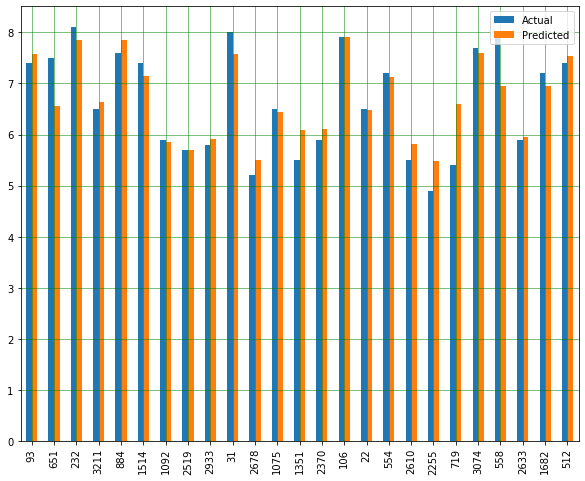

In [211]:
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [212]:
def basic_details(df):
	    b = pd.DataFrame()
	    b['# Missing values'] = df.isnull().sum()
	    b['% Missing values'] = round((df.isnull().sum()/df.shape[0])*100,2)
	    b['# Unique values'] = df.nunique()
	    b['Data type'] = df.dtypes
	    return b
basic_details(movies_ratings)

,# Missing values,% Missing values,# Unique values,Data type
duration,0,0.0,125,float64
rating,0,0.0,67,float64
budget,0,0.0,2478,float64
metascore,0,0.0,94,float64
popularity,0,0.0,2941,float64
...,...,...,...,...
x1_sv,0,0.0,2,float64
x1_th,0,0.0,2,float64
x1_tr,0,0.0,2,float64
x1_xx,0,0.0,2,float64


In [213]:
movies_ratings.index = movies_ratings.index.astype(int)

In [223]:
#pip install keras

In [224]:
#pip install tensorflow

In [288]:
x_train# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
#x = movies_ratings[:,0:8]
#y = movies_ratings[:,8]
y=movies_ratings.rating
x=movies_ratings.drop('rating',axis=1)
# define the keras model
#model = Sequential()
#model.add(Dense(32, input_shape=(109,), activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
# compile the keras model
#model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# fit the keras model on the dataset
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(109, kernel_initializer='normal',input_dim = 109, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
NN_model.fit(x_train, y_train, epochs=50, batch_size=32)
#fit=model.fit(x_train, y_train, epochs=50, batch_size=5)
# evaluate the keras model
#_, accuracy = model.evaluate(x, y)
#print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 109)               11990     
_________________________________________________________________
dense_78 (Dense)             (None, 256)               28160     
_________________________________________________________________
dense_79 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_80 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 257       
Total params: 171,991
Trainable params: 171,991
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2352/2352 [==============================] - 0s 126us/step - loss: 90147.9236 - mean_absolute_error: 9

In [ ]:
#NN_model.evaluate(x_test, y_test)[1]

In [292]:
y_test

,level_0,index,rating
0,0,93,7.4
1,1,651,7.5
2,2,232,8.1
3,3,3211,6.5
4,4,884,7.6
...,...,...,...
584,584,1979,4.3
585,585,1378,6.2
586,586,1872,6.8
587,587,2754,6.5


In [ ]:
#y_test = y_test.to_frame()

In [ ]:
y_test = y_test.reset_index()

In [295]:
#Predict
y_4 = NN_model.predict(x_test).tolist()
y_4 = pd.Series(y_4)
type(y_4)

pandas.core.series.Series

In [296]:
y_4=pd.DataFrame.from_items(zip(y_4.index,y_4.values))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [297]:
y_4=y_4.transpose()

In [298]:
pd.DataFrame(y_4).to_numpy

<bound method DataFrame.to_numpy of             0
0    6.808944
1   -3.959563
2    6.808944
3    6.808944
4    6.808944
..        ...
584  6.808944
585  6.808944
586  6.808944
587  6.808944
588  6.808944

[589 rows x 1 columns]>

In [299]:
df5 = pd.DataFrame({'Actual': y_test['rating'], 'Predicted': y_4[0]})
df5


,Actual,Predicted
0,7.4,6.808944
1,7.5,-3.959563
2,8.1,6.808944
3,6.5,6.808944
4,7.6,6.808944
...,...,...
584,4.3,6.808944
585,6.2,6.808944
586,6.8,6.808944
587,6.5,6.808944


In [300]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test['rating'], y_4[0]))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test['rating'], y_4[0]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['rating'], y_4[0])))

Mean Absolute Error: 1.3202987432884645
Mean Squared Error: 7.728755428387842
Root Mean Squared Error: 2.780063925234066


In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [306]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Get the mean absolute error on the validation data
predicted_ratings = model.predict(x_test)
#MAE = mean_absolute_error(y_test, predicted_ratings)
#print('Random forest validation MAE = ', MAE)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [308]:
predicted_ratings

array([7.68, 6.84, 7.98, 6.56, 7.69, 7.05, 5.4 , 6.06, 6.05, 7.76, 4.69,
       6.84, 6.31, 6.25, 7.86, 6.8 , 6.77, 5.48, 5.77, 6.87, 7.69, 7.04,
       6.12, 6.57, 7.52, 6.32, 6.45, 6.57, 6.75, 7.61, 7.2 , 6.82, 6.79,
       7.66, 7.27, 6.05, 7.02, 7.19, 5.85, 7.05, 8.11, 6.28, 6.5 , 6.33,
       7.71, 6.47, 6.74, 7.56, 7.2 , 5.68, 7.18, 7.29, 6.95, 6.49, 6.42,
       7.34, 6.11, 6.67, 6.56, 6.55, 7.19, 6.81, 6.92, 7.57, 7.5 , 7.14,
       6.98, 5.33, 5.46, 6.33, 6.45, 6.38, 7.48, 6.74, 5.76, 6.22, 6.77,
       6.12, 5.34, 5.43, 6.28, 6.67, 6.34, 6.88, 7.23, 6.8 , 7.76, 6.35,
       6.78, 7.84, 7.24, 7.38, 7.35, 5.83, 6.18, 6.51, 6.69, 6.95, 6.84,
       8.15, 6.54, 5.45, 7.3 , 7.52, 7.22, 7.57, 7.35, 7.04, 8.19, 6.57,
       6.84, 6.63, 7.51, 7.4 , 7.96, 7.25, 6.82, 6.26, 5.97, 6.03, 6.79,
       6.43, 6.32, 5.4 , 7.65, 7.22, 6.58, 6.26, 6.73, 3.86, 5.71, 7.84,
       7.51, 5.34, 6.67, 5.63, 8.21, 6.75, 7.92, 7.27, 7.48, 7.56, 7.67,
       5.92, 6.41, 7.11, 6.94, 6.39, 8.03, 7.22, 7.

In [310]:

df7 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_ratings})
df8 = df3.head(25)
df8

,Actual,Predicted
93,7.4,7.581061
651,7.5,6.548097
232,8.1,7.846261
3211,6.5,6.642328
884,7.6,7.846865
1514,7.4,7.147378
1092,5.9,5.858278
2519,5.7,5.701511
2933,5.8,5.909080
31,8.0,7.570918


In [311]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_ratings))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_ratings))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_ratings)))

Mean Absolute Error: 0.46135823429541595
Mean Squared Error: 0.3482030560271647
Root Mean Squared Error: 0.5900873291532065
